# Proyecto de Fuga de Clientes

- Se trabajará con una base de datos sobre rotación de clientes en una compañía de telecomunicaciones.
- El archivo contiene 3333 registros y 20 atributos.
- El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de telecomunicaciones churn.
- Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

Lista de atributos:

- State: Estado de Estados Unidos.
- Account Length: Tiempo en que la cuenta ha sido activada.
- Area Code: Código de área.
- International plan: Plan internacional activado.
- Voice mail plan : Plan de mensajes de voz activado.
- number_vmail_messages : Cantidad de mensajes de voz.
- total_day_minutes : Cantidad de minutos ocupados en la mañana.
- total_day_calls : Cantidad de llamadas realizadas en la mañana.
- total_day_charge : Cobros realizados en la mañana.
- total_eve_minutes : Cantidad de minutos ocupados en la tarde.
- total_eve_calls : Cantidad de llamadas realizadas en la tarde.
- total_eve_charge : Cobros realizados en la tarde.
- total_night_calls : Cantidad de llamadas realizadas en la noche.
- tota_night_minutes : Cantidad de minutos ocupados en la noche.
- total_night_charge : Cobros realizados en la noche.
- total_intl_minutes : Cantidad de minutos ocupados en llamadas internacionales.
- total_intl_calls : Cantidad de llamadas internacionales realizadas.
- total_intl_charge : Cobros realizados por llamadas internacionales.
- churn : 1 si el cliente se cambió de compañía, 0 de los contrario.

### Sección 1: Preprocesamiento

En esta sección, realizamos el preprocesamiento de los datos cargados desde un archivo CSV. Se incluyen operaciones como la visualización de muestras de datos, información del DataFrame y la exploración gráfica del comportamiento distributivo de los atributos y la variable dependiente.


In [ ]:
# Importar las bibliotecas necesarias
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Configuración de gráficos
plt.style.use('seaborn')
sns.set(style="white")
warnings.simplefilter('ignore')

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Configuración de advertencias
warnings.filterwarnings('ignore')

<ipython-input-1-3435ce21307b>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar datos desde el archivo CSV
archivo_csv_train = '/content/drive/MyDrive/Portafolio/ML Clasificación - Fuga de Clientes/churn_train.csv'
df = pd.read_csv(archivo_csv_train).drop(columns='Unnamed: 0')

# Visualizar algunas filas y obtener información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

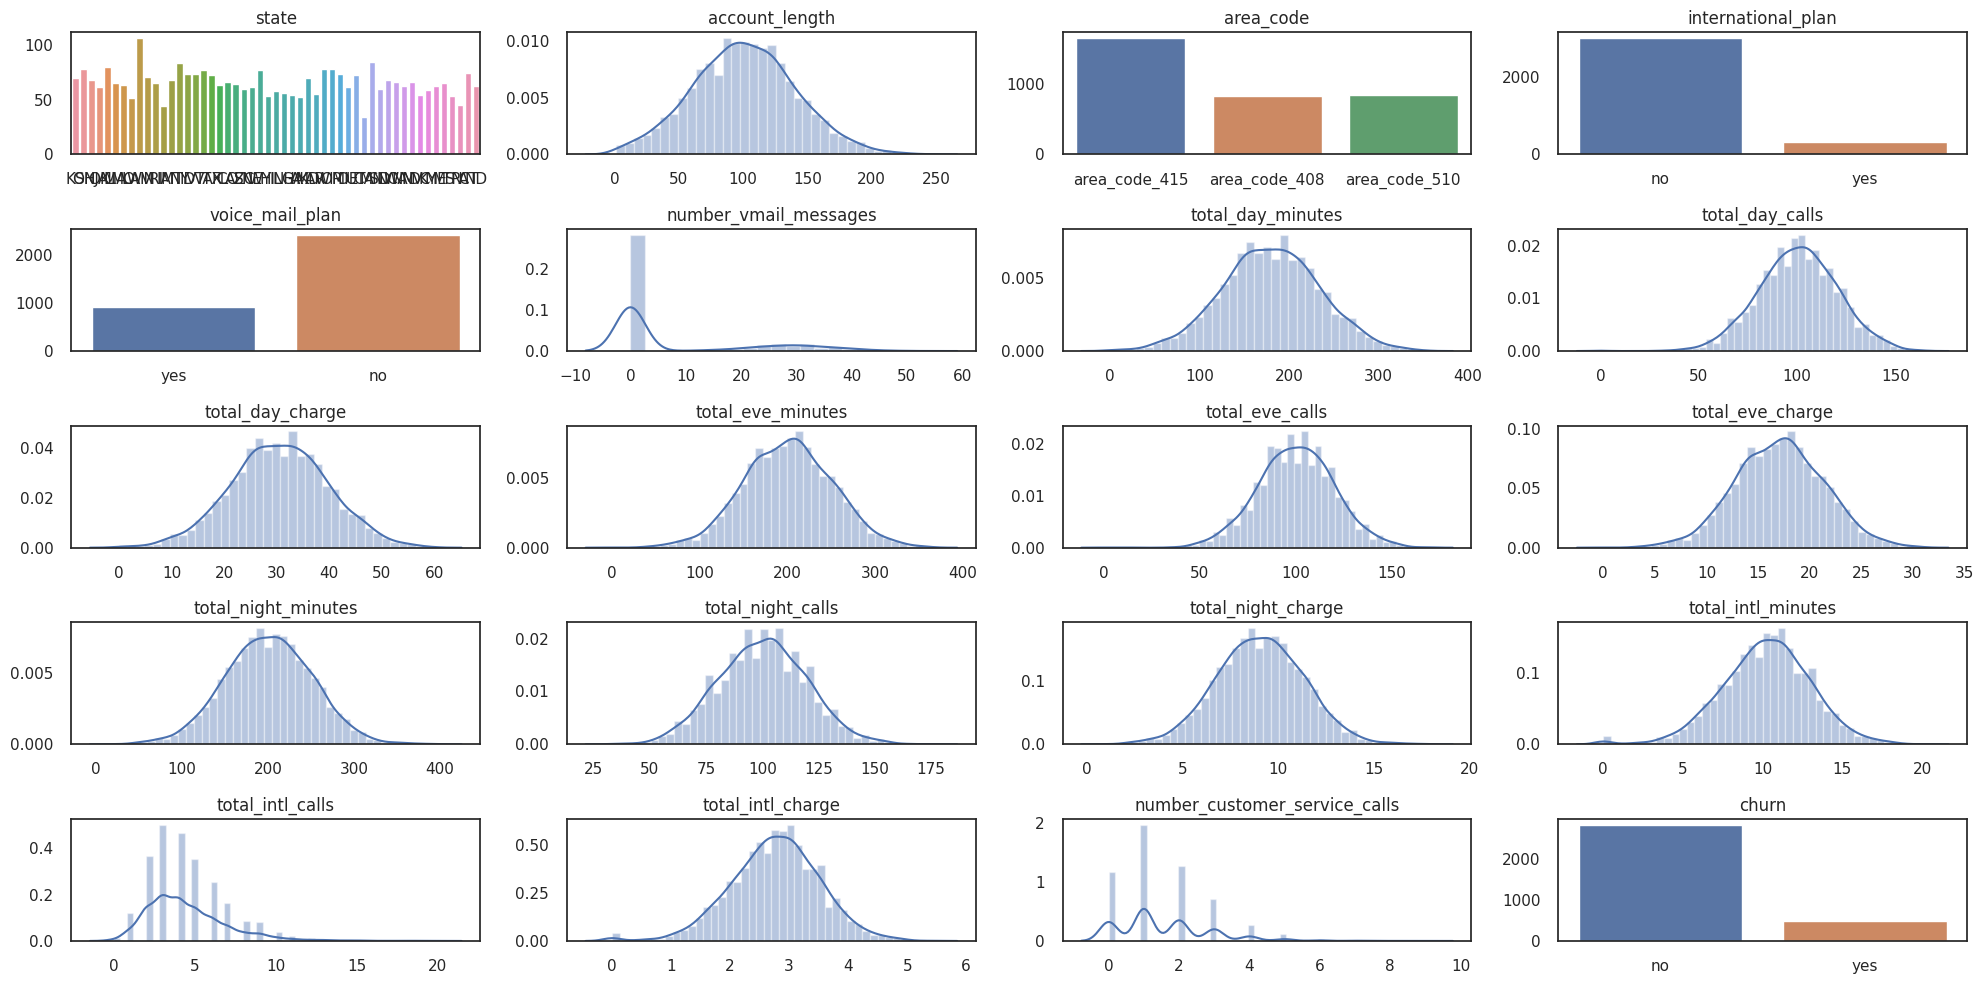

In [ ]:
# Visualizar el comportamiento distributivo de los atributos y la variable dependiente
plt.figure(figsize=(20, 10))
for index, value in enumerate(df):
    plt.subplot(5, 4, index + 1)
    if df[value].dtype != 'object':
        sns.distplot(df[value])
    else:
        sns.countplot(data=df, x=value)
    plt.title(value)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

### Sección 2: Recodificación y Transformación de Atributos

En esta etapa, se realiza la recodificación de variables categóricas en variables binarias y la transformación logarítmica de variables numéricas sesgadas.

In [ ]:
# Recodificación de variables categóricas y transformación de variables numéricas sesgadas
df_state = df['state']
X = df[df.loc[:, 'account_length':'number_customer_service_calls'].columns]
y = np.where(df['churn'] == 'no', 0, 1)

for index, colname in enumerate(X.columns):
    if X[colname].dtype == 'object':
        X = pd.concat([X, pd.get_dummies(X[colname], drop_first=True, prefix=str(colname))], axis=1)
        X = X.drop(columns=[colname])

### Sección 3: Comparación de AdaBoost y Gradient Boosting

En esta sección, entrenamos clasificadores AdaBoost y Gradient Boosting mediante una búsqueda de grilla para mejorar su capacidad predictiva. Luego, se informan las métricas para los mejores modelos encontrados.


Se implementará una búsqueda de grilla con las siguientes especificaciones:

- Modelo: AdaBoostClassifier
- Grilla: {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000, 2000]}


- Modelo: GradientBoostingClassifier
- Grilla: {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50,100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}

In [ ]:
# Entrenar los clasificadores AdaBoost y Gradient Boosting con búsqueda de grilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1414)

# AdaBoost
grid_AdaBoost_fit = GridSearchCV(AdaBoostClassifier(),
                                 param_grid={'learning_rate': [0.01, 0.1, 0.5],
                                             'n_estimators': [50, 100, 500, 1000, 2000]}).fit(X_train, y_train)

# Gradient Boosting
grid_Gradient_fit = GridSearchCV(GradientBoostingClassifier(),
                                 param_grid={'learning_rate': [0.01, 0.1, 0.5],
                                             'n_estimators': [50, 100, 500, 1000, 2000],
                                             'subsample': [0.1, 0.5, 0.9]}).fit(X_train, y_train)

In [ ]:
# Obtener los mejores parámetros
grid_AdaBoost_fit.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [ ]:
# Obtener los mejores parámetros
grid_Gradient_fit.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9}

In [ ]:
# Implementar y reportar métricas
best_AdaBoost_fit = AdaBoostClassifier(learning_rate=0.1,n_estimators=1000).fit(X_train,y_train)
best_Gradient_fit = GradientBoostingClassifier(learning_rate=0.01,n_estimators=2000,subsample=0.9).fit(X_train,y_train)

Ada_hat=best_AdaBoost_fit.predict(X_test)
Grad_hat=best_Gradient_fit.predict(X_test)

print("AdaBoost Metrics:")
print(classification_report(y_test, Ada_hat, digits=3))

print("Gradient Boosting Metrics:")
print(classification_report(y_test, Grad_hat, digits=3))

AdaBoost Metrics:
              precision    recall  f1-score   support

           0      0.899     0.960     0.928       953
           1      0.537     0.299     0.384       147

    accuracy                          0.872      1100
   macro avg      0.718     0.630     0.656      1100
weighted avg      0.850     0.872     0.856      1100

Gradient Boosting Metrics:
              precision    recall  f1-score   support

           0      0.968     0.985     0.977       953
           1      0.892     0.789     0.838       147

    accuracy                          0.959      1100
   macro avg      0.930     0.887     0.907      1100
weighted avg      0.958     0.959     0.958      1100



### Sección 4: Principales Factores Asociados

En esta sección, se identifican los factores más importantes asociados con la fuga de clientes utilizando el mejor modelo de Gradient Boosting. Se visualiza la importancia relativa de los atributos.

Text(0.5, 1.0, 'Feature importance')

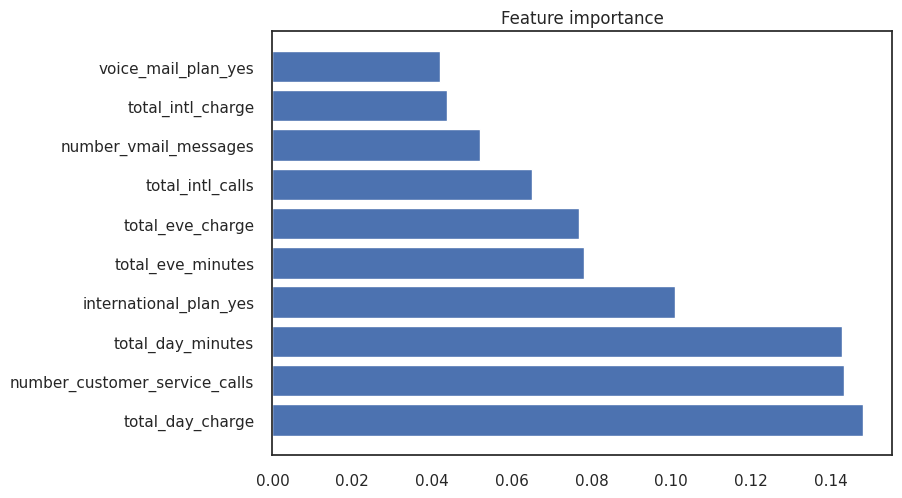

In [ ]:
# Obtener la importancia relativa de los atributos para el mejor modelo de Gradient Boosting
top10_importance = pd.DataFrame(list(zip(X.columns, best_Gradient_fit.feature_importances_))) \
    .rename(columns={0: 'Atributo', 1: 'Importance'}) \
    .sort_values('Importance', ascending=False).head(10).reset_index(drop=True)

# Visualizar la importancia de los atributos
plt.barh(top10_importance['Atributo'], top10_importance['Importance'])
plt.title("Feature importance")

### Sección 5: Probabilidad de Fuga

En esta etapa, se implementa el modelo predictivo con el archivo churn_test.csv para identificar los tres estados con la mayor probabilidad de fuga.

Se identificarán los tres estados con una mayor probabilidad de fuga.

In [ ]:
# Identificar los tres estados con mayor probabilidad de fuga de clientes
archivo_csv_test = '/content/drive/MyDrive/Portafolio/ML Clasificación - Fuga de Clientes/churn_test.csv'
df_fuga = pd.read_csv(archivo_csv_test).drop(columns='Unnamed: 0')

df_fuga_state = df_fuga['state']
X_fuga = df_fuga[df_fuga.loc[:, 'account_length':'number_customer_service_calls'].columns]
y_fuga = np.where(df_fuga['churn'] == 'no', 0, 1)

for index, colname in enumerate(X_fuga.columns):
    if X_fuga[colname].dtype == 'object':
        X_fuga = pd.concat([X_fuga, pd.get_dummies(X_fuga[colname], drop_first=True, prefix=str(colname))],
                           axis=1)
        X_fuga = X_fuga.drop(columns=[colname])

In [ ]:
# Predecir la probabilidad de fuga con el mejor modelo de Gradient Boosting
fuga_hat = best_Gradient_fit.predict_proba(X_fuga)

In [ ]:
# Crear un DataFrame con las probabilidades de fuga por estado
df_fuga_hat = pd.DataFrame.from_records(fuga_hat, columns=['No_fuga', 'Fuga']).drop(columns='No_fuga')
df_final = pd.concat([df_fuga_state, df_fuga_hat], axis=1)
df_final_3 = df_final.groupby(['state']).mean().reset_index().sort_values('Fuga', ascending=False).head(3)

# Mostrar los tres estados con mayor probabilidad de fuga
print(df_final_3)

   state      Fuga
36    OK  0.248983
31    NJ  0.219805
4     CA  0.194845
